# Convolutional Neural Network

# Image Classifier using Convolutional Neural Network

Convolutional neural network is a regularized type of feed-forward neural network that learns feature engineering by itself via filters optimization. Vanishing gradients and exploding gradients, seen during backpropagation in earlier neural networks, are prevented by using regularized weights over fewer connections.

Do you know how CNN works?
<br>
![image.jpeg](https://miro.medium.com/v2/resize:fit:1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

## Let's import the necessary packages
***Please make a note that this notebook is done using Tensorflow package. But alternatively, it can also be done using PyTorch***

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.9 MB/s eta 0:00:00


## Loading the pretrained dataset
### CIFAR 10 Dataset
The CIFAR-10 dataset (Canadian Institute for Advanced Research, 10 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images. The images are labelled with one of 10 mutually exclusive classes: airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck). There are 6000 images per class with 5000 training and 1000 testing images per class.
<br>

![image.webp](https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-10-dataset-Activeloop-Platform-visualization-image-1.webp)

In [31]:
#Let's load the CIFAR 10 dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

In [32]:
train_images, test_images = train_images / 255.0, test_images / 255.0

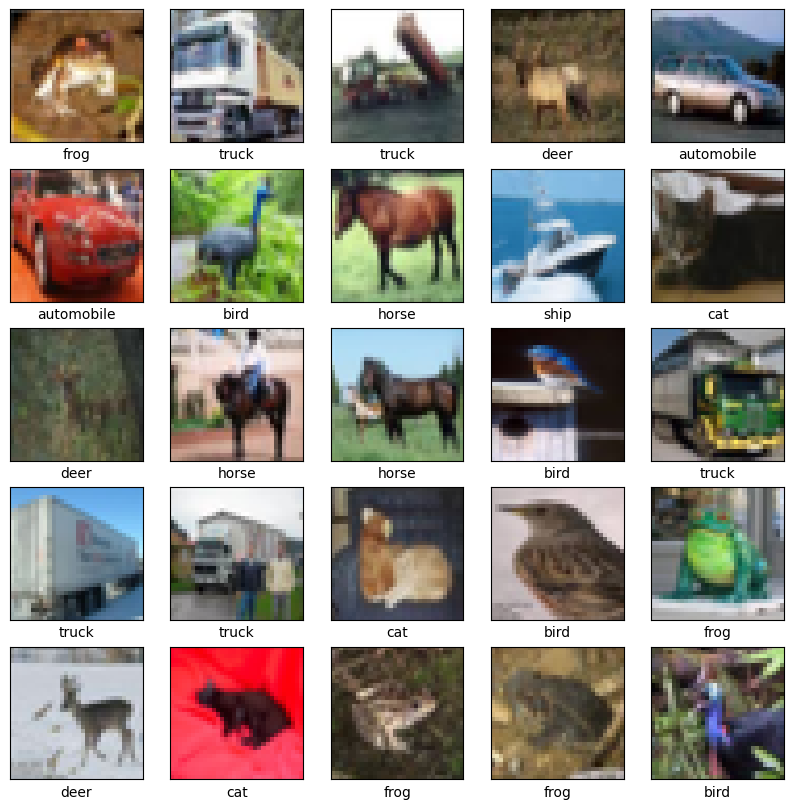

In [33]:
#plotting the training data with labels
class_names = ['airplane','automobile','bird','cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
#Let's check the pixel values
print(train_images)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

Now the training images pixels are in color space. But the major source of CNN is to have the image in black and white pixels in the form of 0 and 1.

In [5]:
#Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Let's build the model

The architecture of the CNN Model built is given below <br>

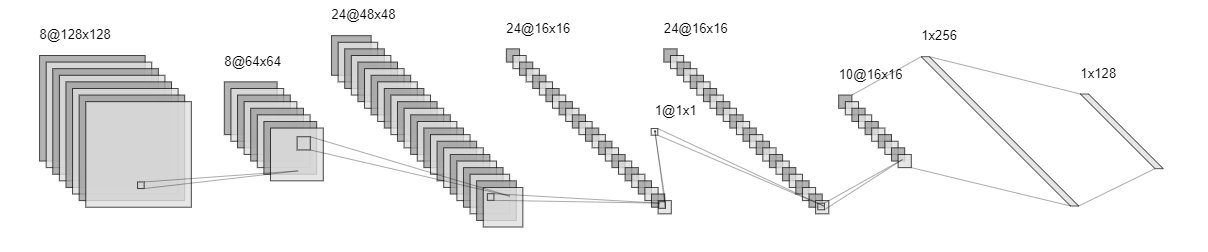

In [6]:
def CNN_Model():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(Flatten())
  model.add(Dense(64,activation = 'relu'))
  model.add(Dense(10))
  model.compile(optimizer = 'adam', loss= 'mse',metrics = ['accuracy'])
  return model

## Fitting the model with training data

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 7.8010 - accuracy: 0.0911
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 6.4644 - accuracy: 0.0941
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 5.7438 - accuracy: 0.0907
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 5.1883 - accuracy: 0.0896
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 4.7733 - accuracy: 0.0872
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 4.4744 - accuracy: 0.0941
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 4.2379 - accuracy: 0.0865
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 3.9597 - accuracy: 0.0860
Epoch 9/10
1563/1563 [==============================] - 75s 48ms/step - loss: 3.7536 - accuracy: 0.0916
Epoch 10/10
1563/1563 [==============================] - 71s 45m

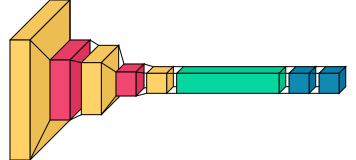

In [7]:
model = CNN_Model()
history = model.fit(train_images, train_labels, epochs = 10)
model.summary()
plot_model(model, show_shapes = True, show_layer_names = True)
visualkeras.layered_view(model)

## Let's test the model with test image and test labels

In [9]:
# Let's evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("Test data Loss:", test_loss)
print("Test data accuracy:", test_acc)

313/313 - 6s - loss: 4.2954 - accuracy: 0.0947 - 6s/epoch - 19ms/step
Test data Loss: 4.295412540435791
Test data accuracy: 0.09470000118017197


## Let's plot the images

313/313 [==============================] - 5s 14ms/step


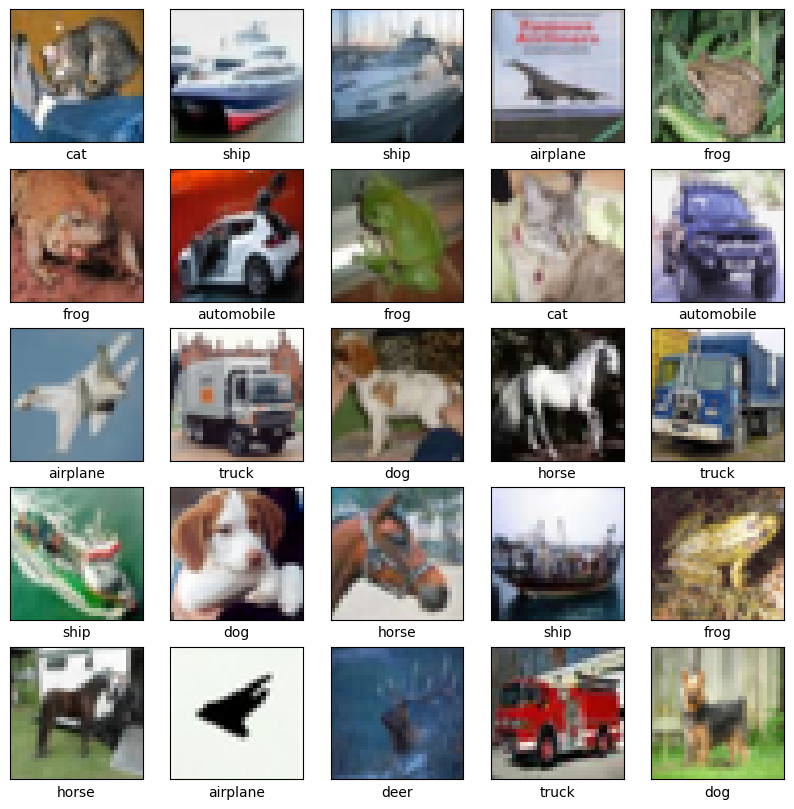

In [49]:
prediction = model.predict(test_images)
class_names = ['airplane','automobile','bird','cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(class_names[test_labels[i][0]])
plt.show()

## Predict data from outside source (Not Recommended)

(2804, 1862, 3)


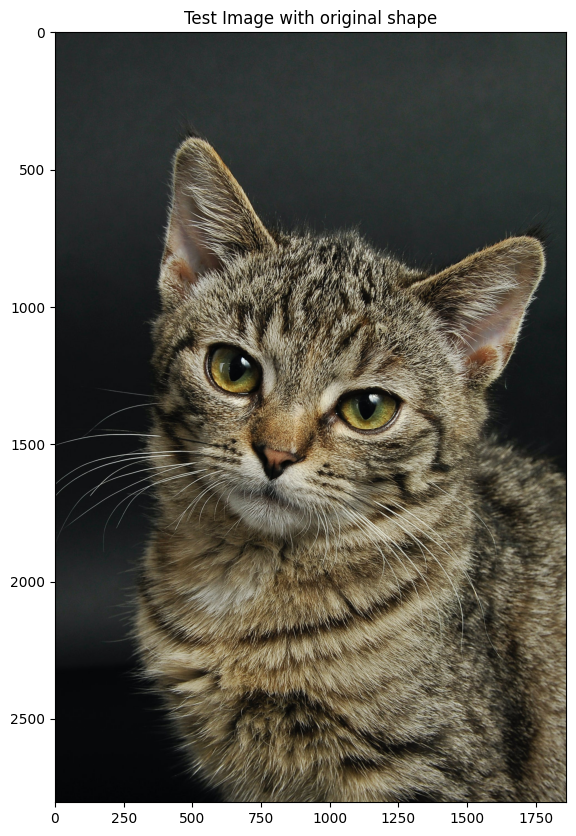

In [46]:
# Let's ask the model to predict
import cv2 as cv
test_image1 = cv.imread('test_imagecat.jpg')
test_image1 = cv.cvtColor(test_image1, cv.COLOR_BGR2RGB)
print(test_image1.shape)
plt.figure(figsize = (10,10))
plt.imshow(test_image1)
plt.title("Test Image with original shape")
plt.show()

(1, 32, 32, 3)
(32, 32, 3)


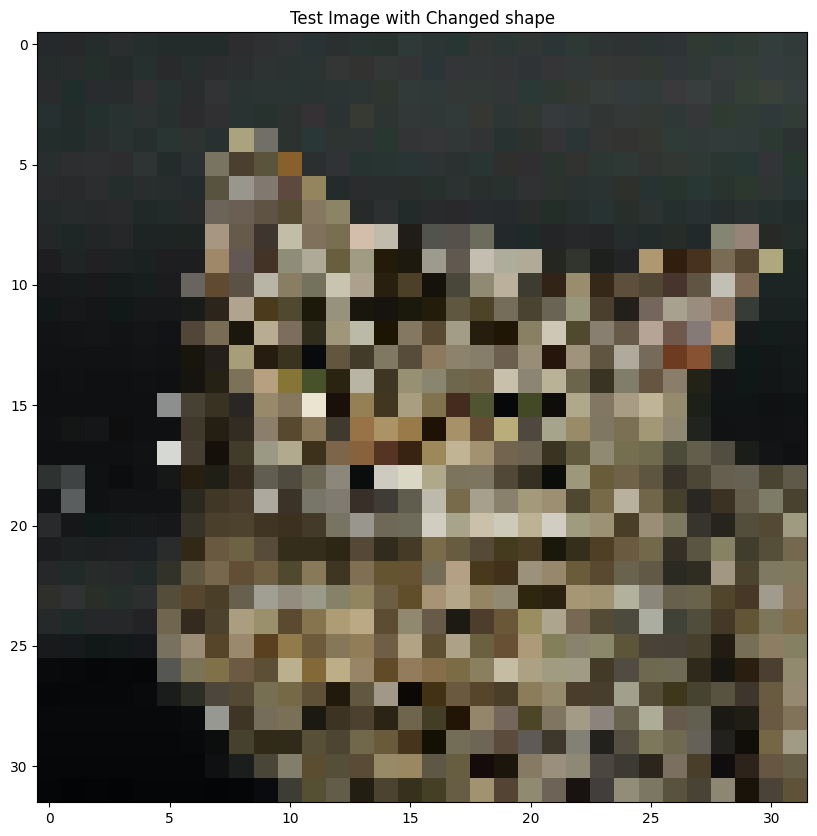

In [47]:
#Let's resize the image
import numpy as np
test_image1 = test_image1/255.
resized_image = cv.resize(test_image1,(32,32))
test = np.expand_dims(resized_image,axis=0)
print(test.shape)
print(resized_image.shape)
plt.figure(figsize = (10,10))
plt.imshow(resized_image)
plt.title("Test Image with Changed shape")
plt.show()

In [48]:
#Let's predict the image
prediction = model.predict(test)
ans = np.argmax(prediction)
print(ans)

1/1 [==============================] - 0s 22ms/step
7


# Create Custom Dataset and test the model

In [50]:
# Image Data Generator is the package which will be used to generate image data compatible with tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Import the train dataset and test dataset directory

In [51]:
train_data_directory = 'dataset/train'
test_data_directory = 'dataset/test'

Create a train data and test data Generator with some hyperparameters

In [52]:
train_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range = 45,
                                          width_shift_range = 0.3,
                                          height_shift_range = 0.3,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')
val_data_generator = ImageDataGenerator(rescale = 1./255)

## This is the generator which is compatible with neural networks to undergo training

In [53]:
train_generator = train_data_generator.flow_from_directory(train_data_directory,
                                                           target_size = (32,32),
                                                           batch_size = 32,
                                                           class_mode = 'categorical')
val_generator = val_data_generator.flow_from_directory(test_data_directory,
                                                      target_size = (32,32),
                                                      batch_size = 32,
                                                      class_mode = 'categorical')

Found 12 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


Find the number of training class images and training class names

In [54]:
train_class_names = set()
num_train_samples = 0
for i in train_generator.filenames:
  train_class_names.add(i.split('/')[0])
  num_train_samples+=1
print(num_train_samples)
print(train_class_names)

12
{'dog', 'cat'}


Find the number valid class images and valid class names

In [55]:
val_class_names = set()
num_val_samples=0
for i in val_generator.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
print(val_class_names)

3
{'dog', 'cat'}


Find the number of classes in total

In [56]:
num_classes = len(train_generator.class_indices)
print(num_classes)

3


# Build the CNN Model

The Same CNN Model used above is used here <br>

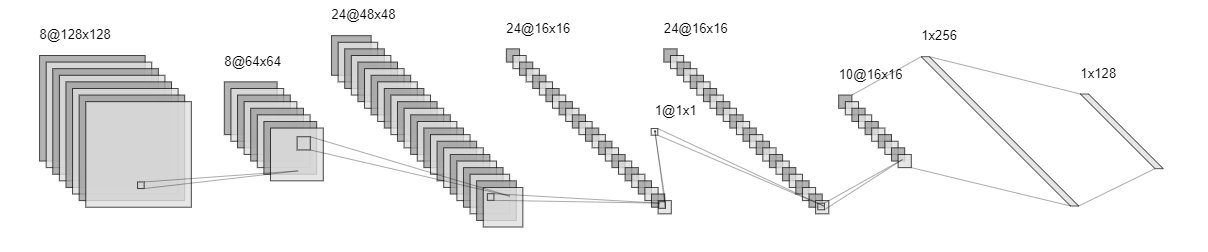

In [57]:
def CNN_Model():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(Flatten())
  model.add(Dense(64,activation = 'relu'))
  model.add(Dense(3))
  model.compile(optimizer = 'adam', loss= 'mse',metrics = ['accuracy'])
  return model

## Fit the Model with the dataset generated

In [58]:
model = CNN_Model()
history = model.fit(train_generator,epochs = 20)
model.summary()

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.4197 - accuracy: 0.0833
Epoch 2/20
1/1 [==============================] - 0s 238ms/step - loss: 0.2203 - accuracy: 0.5833
Epoch 3/20
1/1 [==============================] - 0s 159ms/step - loss: 0.2035 - accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 0s 146ms/step - loss: 0.1860 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 188ms/step - loss: 0.1781 - accuracy: 0.5833
Epoch 6/20
1/1 [==============================] - 0s 143ms/step - loss: 0.1814 - accuracy: 0.5833
Epoch 7/20
1/1 [==============================] - 0s 142ms/step - loss: 0.1746 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 0s 183ms/step - loss: 0.1723 - accuracy: 0.5833
Epoch 9/20
1/1 [==============================] - 0s 141ms/step - loss: 0.1753 - accuracy: 0.5833
Epoch 10/20
1/1 [==============================] - 0s 186ms/step - loss: 0.1740 - accuracy: 0.5000
Epoch 11/20
1/1 [=====

In [80]:
images, labels = next(train_generator)
test_images, test_labels = next(val_generator)

## Find the test loss and accuracy of the model trained

In [81]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.2014 - accuracy: 0.3333 - 135ms/epoch - 135ms/step


## Find the prediction with the test images

In [93]:
prediction = model.predict(test_images)
prediction

1/1 [==============================] - 0s 44ms/step


array([[-0.02310809,  0.5444458 ,  0.6799672 ],
       [-0.01204659,  0.4849596 ,  0.6956947 ],
       [ 0.02505732,  0.6322221 ,  0.7265952 ]], dtype=float32)

## Plot the training images

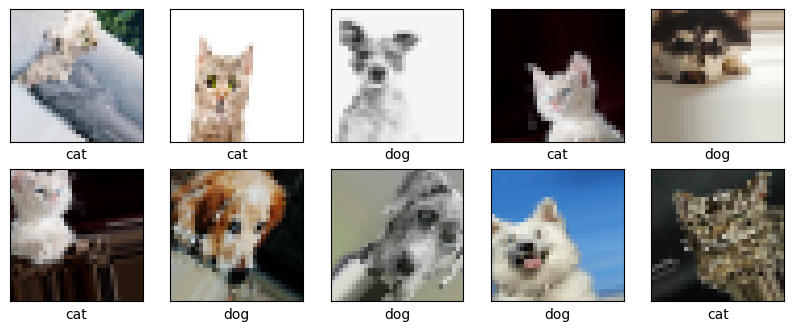

In [89]:
class_names = ['unknown','cat','dog']
labels = labels.astype(int)
plt.figure(figsize = (10,10))
for i in range(10):
  label_id = -1
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i])
  for j in range(len(labels[i])):
    if labels[i][j] == 1:
        label_id = j
  plt.xlabel(class_names[label_id])
plt.show()

(798, 1200, 3)


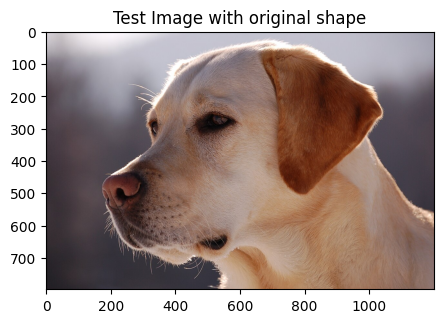

In [101]:
#Let's start predicting the data
import cv2 as cv
test_image1 = cv.imread('test_imagedog.jpg')
test_image1 = cv.cvtColor(test_image1, cv.COLOR_BGR2RGB)
print(test_image1.shape)
plt.figure(figsize = (5,10))
plt.imshow(test_image1)
plt.title("Test Image with original shape")
plt.show()

(1, 32, 32, 3)
(32, 32, 3)


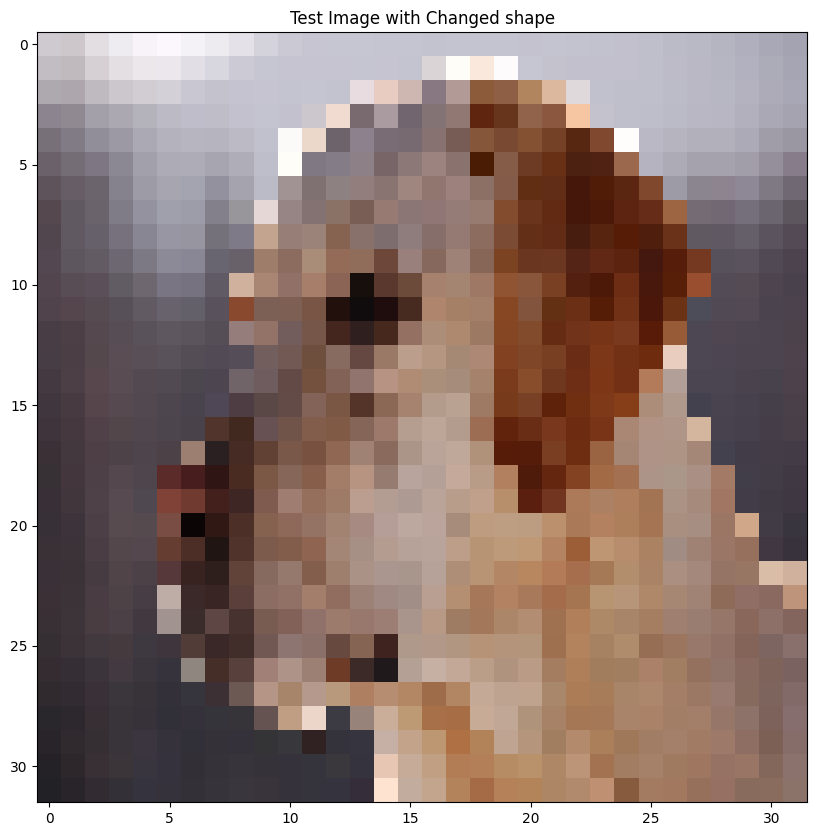

In [102]:
# Let's resize the image
test_image1 = test_image1/255.
resized_image = cv.resize(test_image1, (32,32))
test = np.expand_dims(resized_image,axis=0)
print(test.shape)
print(resized_image.shape)
plt.figure(figsize = (10,10))
plt.imshow(resized_image)
plt.title("Test Image with Changed shape")
plt.show()

In [103]:
prediction = model.predict(test)
ans=np.argmax(prediction,axis=1)
print(ans)

1/1 [==============================] - 0s 68ms/step
[2]
